In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn import tree, preprocessing
import sklearn.ensemble as ske
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# from google.colab import drive
# drive.mount('/content/drive')

In [27]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [133]:
from sklearn.metrics import accuracy_score, classification_report, f1_score

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

In [ ]:
# trainFile = "E:/SJSU - Grad/Spring 23/255/Project/data/train_new.csv"
# testFile = "E:/SJSU - Grad/Spring 23/255/Project/data/test_new.csv"

trainFile = "E:/SJSU - Grad/Spring 23/255/Project/data/train.csv"
testFile = "E:/SJSU - Grad/Spring 23/255/Project/data/test.csv"

test_data = pd.read_csv(testFile)
train_data = pd.read_csv(trainFile)

In [ ]:
scaler = MinMaxScaler()

In [ ]:
good_cols = ["FIRE_YEAR","DISCOVERY_DOY","DISCOVERY_TIME","CONT_DOY","CONT_TIME","STAT_CAUSE_CODE",
             "FIRE_SIZE_SCALED","LATITUDE","LONGITUDE","STATE","DISCOVERY_DATE"]

# select the columns you want to keep
keep_cols = good_cols

In [ ]:
train_data.shape

In [ ]:
test_data.shape

In [19]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 713605 entries, 0 to 713604
Data columns (total 30 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   OBJECTID                    713605 non-null  int64  
 1   FOD_ID                      713605 non-null  int64  
 2   FPA_ID                      713605 non-null  object 
 3   SOURCE_SYSTEM_TYPE          713605 non-null  object 
 4   SOURCE_SYSTEM               713605 non-null  object 
 5   NWCG_REPORTING_AGENCY       713605 non-null  object 
 6   NWCG_REPORTING_UNIT_ID      713605 non-null  object 
 7   NWCG_REPORTING_UNIT_NAME    713605 non-null  object 
 8   SOURCE_REPORTING_UNIT       713605 non-null  object 
 9   SOURCE_REPORTING_UNIT_NAME  713605 non-null  object 
 10  FIRE_NAME                   711357 non-null  object 
 11  FIRE_YEAR                   713605 non-null  int64  
 12  DISCOVERY_DATE              713605 non-null  float64
 13  DISCOVERY_DOY 

In [ ]:
train_data.dtypes

In [ ]:
train_data.sample(5)

In [ ]:
train_data['FIRE_SIZE_SCALED'] = scaler.fit_transform(train_data[['FIRE_SIZE']])

In [ ]:
# good_cols = ["FIRE_YEAR","DISCOVERY_DOY","DISCOVERY_TIME","CONT_DOY","CONT_TIME","STAT_CAUSE_CODE",
#              "FIRE_SIZE_SCALED","LATITUDE","LONGITUDE","STATE","DISCOVERY_DATE"]

# prefix1 = 'STAT_CAUSE_DESCR_'
# prefix2 = 'FIPS_NAME_'

# # select the columns you want to keep
# keep_cols1 = train_data.filter(like=prefix1).columns.tolist()
# keep_cols2 = train_data.filter(like=prefix2).columns.tolist()
# keep_cols = good_cols + keep_cols1 + keep_cols2

In [ ]:
train_data["STAT_CAUSE_DESCR"].value_counts()

In [ ]:
df_interest = train_data[keep_cols]

In [ ]:
df_interest.head()

In [ ]:
mycols = ["LATITUDE", "LONGITUDE", "STATE"]
mydf = train_data[mycols]
mydf.shape

In [ ]:
X = mydf.drop(["STATE"], axis=1)
Y = LabelEncoder().fit_transform(mydf.STATE.values)

print(X.shape)
print(Y.shape)

In [ ]:
Y[:10]

In [ ]:
X = df_interest.drop(["STATE", "DISCOVERY_DATE", "DISCOVERY_TIME"], axis=1)
X = scaler.fit_transform(X.to_numpy())
Y = LabelEncoder().fit_transform(df_interest.STATE.values)

print(X.shape)
print(Y.shape)
pdX = pd.DataFrame(X)
pdX.head()

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
mlp_classifier2 = MLPClassifier(
    hidden_layer_sizes=(180,120,60),
    activation="relu",
    solver="adam",
    max_iter=100,
    verbose=True,
    learning_rate = "adaptive"
)

In [ ]:
Y_test[:14]

In [ ]:
mlp_classifier2.fit(X_train, Y_train)

### Predict and evaluate on the test data

In [ ]:

predict_test = mlp_classifier2.predict(X_test)
accuracy_score(Y_test, predict_test)

### Predict and evaluate on the train data

In [ ]:
predict_train = mlp_classifier2.predict(X_train)
accuracy_score(Y_train, predict_train)

In [ ]:
plt.plot(mlp_classifier2.loss_curve_)
plt.show()

In [ ]:
mycols

In [ ]:
X = test_data[good_cols].drop(["STATE", "DISCOVERY_DATE", "DISCOVERY_TIME"], axis=1)
X = scaler.fit_transform(X.to_numpy())
Y = LabelEncoder().fit_transform(test_data[good_cols].STATE.values)

print(X.shape)
print(Y.shape)

In [ ]:
result = mlp_classifier2.predict(X)

In [ ]:
accuracy_score(result, Y)

In [ ]:
train_data.head()
len(train_data.columns)

In [ ]:
plt.matshow(train_data.corr())
plt.show()

In [ ]:
df = train_data
df["STATE"] = LabelEncoder().fit_transform(train_data.STATE.values)
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

plt.savefig("corr_train_nandu.png")

Lets Predict the STAT_CAUSE_DESCR column with perceptron

In [ ]:
train_data["STAT_CAUSE_DESCR"].value_counts()

In [ ]:
len(train_data[train_data["STAT_CAUSE_DESCR"] == "Missing/Undefined"])

In [ ]:
good_cols_new = ["FIRE_YEAR","DISCOVERY_DOY","DISCOVERY_TIME","CONT_DOY","CONT_TIME","STAT_CAUSE_CODE","FIRE_SIZE","LATITUDE","LONGITUDE","STATE","DISCOVERY_DATE"]
df_model_new = train_data[good_cols_new]
df_model_new.sample(10)

In [ ]:
df_model_new["STATE"] = LabelEncoder().fit_transform(df_model_new.STATE.values)
df_model_new.sample(5)

Prepare data for our model

In [ ]:
X = df_model_new.drop(["STAT_CAUSE_CODE"], axis=1)
Y = df_model_new["STAT_CAUSE_CODE"]
X.shape, Y.shape

In [ ]:
X.head()

In [ ]:
Y.head()

In [ ]:
# X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
# X.shape

X = scaler.fit_transform(X)
X.shape

In [ ]:
Y.head()

In [ ]:
classifier_scdescr = MLPClassifier(
    hidden_layer_sizes=(180,120,60),
    activation="relu",
    solver="adam",
    max_iter=100,
    verbose=True,
    learning_rate = "adaptive"
)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
classifier_scdescr.fit(X_train, Y_train)

In [ ]:
prediction_new = classifier_scdescr.predict(X_test)
accuracy_score(prediction_new, Y_test)

## Predict the fire severity clas

In [86]:
train_data.sample(10)

,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,...,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,FIPS_NAME,Shape,FIRE_SIZE_SCALED
205965,1580541,201509625,W-649015,FED,DOI-WFMI,BIA,USSDPRA,Pine Ridge Agency,SDPRA,Pine Ridge Agency,...,205.00,D,43.324860,-102.178030,2.0,BIA,SD,Unknown,b'\x00\x01\xad\x10\x00\x00<\xed\xf0\xd7d\x8bY\...,3.377571e-04
303949,1724442,300002575,FS-1520059,FED,FS-FIRESTAT,FS,USNMCIF,Cibola National Forest,0303,Cibola National Forest,...,1.70,B,35.671667,-99.569444,13.0,STATE OR PRIVATE,OK,Roger Mills,b'\x00\x01\xad\x10\x00\x00\x18\xac\x17\xc7q\xe...,2.800896e-06
468509,207124,209867,W-423316,FED,DOI-WFMI,BIA,USAZSCA,San Carlos Agency,AZSCA,San Carlos Agency,...,0.50,B,33.186700,-110.197300,2.0,BIA,AZ,Unknown,b'\x00\x01\xad\x10\x00\x00\x0c\xe0-\x90\xa0\x8...,8.237814e-07
131102,265966,271017,W-574471,FED,DOI-WFMI,BIA,USSDPRA,Pine Ridge Agency,SDPRA,Pine Ridge Agency,...,0.20,A,43.239400,-102.473600,2.0,BIA,SD,Unknown,b'\x00\x01\xad\x10\x00\x00\xac\xd8_vO\x9eY\xc0...,3.295027e-07
392058,214679,217775,W-559696,FED,DOI-WFMI,BLM,USCACND,Central California District,CABBD,Bakersfield District,...,0.10,A,35.612936,-118.475464,8.0,PRIVATE,CA,Kern,b'\x00\x01\xad\x10\x00\x008\x9b\x8e\x00n\x9e]\...,1.647431e-07
122480,1779202,300133051,SFO-2014ORODF20149550902014,NONFED,ST-NASF,ST/C&L,USORORS,Oregon Department of Forestry State Headquarters,ORODF,Oregon Department of Forestry,...,0.27,B,44.314440,-121.706940,8.0,PRIVATE,OR,Deschutes,b'\x00\x01\xad\x10\x00\x00\xfc\x0eE\x81>m^\xc0...,4.448344e-07
111045,1605193,201626143,SFO-AR-2012-AR2/22/201219611,NONFED,ST-NASF,ST/C&L,USARARS,Arkansas Forestry Commission,AFC,Arkansas Forestry Commission,...,11.00,C,35.925960,-93.222390,8.0,PRIVATE,AR,Newton,b'\x00\x01\xad\x10\x00\x00D=D\xa3;NW\xc0\xc0\x...,1.812354e-05
373823,29697,29844,FS-1469936,FED,FS-FIRESTAT,FS,USCABDF,San Bernardino National Forest,0512,San Bernardino National Forest,...,0.10,A,33.851667,-116.731667,5.0,USFS,CA,Riverside,b'\x00\x01\xad\x10\x00\x00H\xcep\xa0\xd3.]\xc0...,1.647431e-07
527973,1061343,1273702,FS-382366,FED,FS-FIRESTAT,FS,USTNCNF,Cherokee National Forest,0804,Cherokee National Forest,...,3.00,B,36.181944,-82.412222,13.0,STATE OR PRIVATE,TN,Unicoi,b'\x00\x01\xad\x10\x00\x00heN\xd9a\x9aT\xc0\xa...,4.942771e-06
77939,1303864,1774635,SFO-NY-NY5145-2007-070032,NONFED,ST-NASF,ST/C&L,USNYNYX,Fire Department of New York,NY5145,Fire Department of New York,...,1.45,B,42.424485,-77.101909,14.0,MISSING/NOT SPECIFIED,NY,Schuyler,b'\x00\x01\xad\x10\x00\x00hT3\xad\x85FS\xc0 \x...,2.388997e-06


In [87]:
train_data["FIRE_SIZE_CLASS"].value_counts()

B    309505
A    304515
C     74016
D     11746
E      6864
F      4460
G      2499
Name: FIRE_SIZE_CLASS, dtype: int64

In [88]:
good_cols

['FIRE_YEAR',
 'DISCOVERY_DOY',
 'DISCOVERY_TIME',
 'CONT_DOY',
 'CONT_TIME',
 'STAT_CAUSE_CODE',
 'FIRE_SIZE_SCALED',
 'LATITUDE',
 'LONGITUDE',
 'STATE',
 'DISCOVERY_DATE',
 'FIRE_SIZE_CLASS']

In [89]:
df_sev = train_data[good_cols]

In [90]:
df_sev.sample(5)

,FIRE_YEAR,DISCOVERY_DOY,DISCOVERY_TIME,CONT_DOY,CONT_TIME,STAT_CAUSE_CODE,FIRE_SIZE_SCALED,LATITUDE,LONGITUDE,STATE,DISCOVERY_DATE,FIRE_SIZE_CLASS
479668,2011,261,845,261.0,945,9.0,1.647431e-07,48.927550,-117.775230,WA,2455822.5,A
493408,1992,61,1650,61.0,1930,7.0,3.295190e-05,31.391821,-89.529697,MS,2448682.5,C
704270,2002,74,1430,74.0,1530,5.0,4.942622e-07,35.476500,-83.366300,NC,2452348.5,B
105598,2006,1,1645,1.0,1730,2.0,1.647431e-07,35.515600,-98.918300,OK,2453736.5,A
414424,2012,225,1833,232.0,1000,1.0,3.443473e-05,36.470000,-113.635300,AZ,2456151.5,C


Perform One hot encoding for STAT_CAUSE_CODE

In [91]:
one_hot_enc = OneHotEncoder(handle_unknown = "ignore")

In [92]:
extra_cols = pd.get_dummies(df_sev.STAT_CAUSE_CODE, prefix = "STAT_CAUSE_CODE")
extra_cols.sample(4)

,STAT_CAUSE_CODE_1.0,STAT_CAUSE_CODE_2.0,STAT_CAUSE_CODE_3.0,STAT_CAUSE_CODE_4.0,STAT_CAUSE_CODE_5.0,STAT_CAUSE_CODE_6.0,STAT_CAUSE_CODE_7.0,STAT_CAUSE_CODE_8.0,STAT_CAUSE_CODE_9.0,STAT_CAUSE_CODE_10.0,STAT_CAUSE_CODE_11.0,STAT_CAUSE_CODE_12.0,STAT_CAUSE_CODE_13.0
91763,1,0,0,0,0,0,0,0,0,0,0,0,0
89706,0,0,0,1,0,0,0,0,0,0,0,0,0
682172,0,1,0,0,0,0,0,0,0,0,0,0,0
35953,1,0,0,0,0,0,0,0,0,0,0,0,0


In [93]:
df_sev_1 = pd.concat([df_sev, extra_cols], axis=1)

In [94]:
df_sev_1 = df_sev_1.drop(["STAT_CAUSE_CODE"], axis=1)
df_sev_1.sample(4)

,FIRE_YEAR,DISCOVERY_DOY,DISCOVERY_TIME,CONT_DOY,CONT_TIME,FIRE_SIZE_SCALED,LATITUDE,LONGITUDE,STATE,DISCOVERY_DATE,...,STAT_CAUSE_CODE_4.0,STAT_CAUSE_CODE_5.0,STAT_CAUSE_CODE_6.0,STAT_CAUSE_CODE_7.0,STAT_CAUSE_CODE_8.0,STAT_CAUSE_CODE_9.0,STAT_CAUSE_CODE_10.0,STAT_CAUSE_CODE_11.0,STAT_CAUSE_CODE_12.0,STAT_CAUSE_CODE_13.0
655153,2015,17,1054,17.0,1108,1.645948e-08,38.120000,-97.920000,KS,2457039.5,...,0,0,0,0,0,1,0,0,0,0
75408,2000,212,1347,212.0,1347,5.931343e-05,33.280800,-82.235300,GA,2451755.5,...,0,0,0,0,0,0,0,0,0,0
82065,1996,183,800,183.0,1200,8.237814e-07,33.360100,-110.457300,AZ,2450265.5,...,0,0,0,0,0,1,0,0,0,0
483682,2007,123,1559,123.0,1559,1.647431e-07,41.429029,-73.577046,NY,2454223.5,...,0,0,0,0,0,1,0,0,0,0


In [95]:
df_sev_main = df_sev_1[0:0]
print(df_sev_main.shape)
for c in df_sev_1["FIRE_SIZE_CLASS"].unique():
    df_sev_main = pd.concat([df_sev_main, df_sev_1[df_sev_1["FIRE_SIZE_CLASS"] == c].sample(2400)])

df_sev_main["FIRE_SIZE_CLASS"].value_counts()

(0, 24)


A    2400
C    2400
B    2400
D    2400
E    2400
G    2400
F    2400
Name: FIRE_SIZE_CLASS, dtype: int64

In [96]:
df_sev_main.sample(7)

,FIRE_YEAR,DISCOVERY_DOY,DISCOVERY_TIME,CONT_DOY,CONT_TIME,FIRE_SIZE_SCALED,LATITUDE,LONGITUDE,STATE,DISCOVERY_DATE,...,STAT_CAUSE_CODE_4.0,STAT_CAUSE_CODE_5.0,STAT_CAUSE_CODE_6.0,STAT_CAUSE_CODE_7.0,STAT_CAUSE_CODE_8.0,STAT_CAUSE_CODE_9.0,STAT_CAUSE_CODE_10.0,STAT_CAUSE_CODE_11.0,STAT_CAUSE_CODE_12.0,STAT_CAUSE_CODE_13.0
431415,1995,98,1620,115.0,800,0.003544,37.391667,-80.170000,VA,2449815.5,...,0,0,0,0,0,0,0,0,0,0
552079,1997,251,1115,251.0,1433,0.000002,37.149400,-108.703400,CO,2450699.5,...,0,1,0,0,0,0,0,0,0,0
24461,2001,173,1651,174.0,1349,0.000016,38.701900,-115.301100,NV,2452082.5,...,0,0,0,0,0,0,0,0,0,0
288771,1995,183,2330,185.0,1800,0.001648,33.933400,-114.517500,AZ,2449900.5,...,0,0,0,1,0,0,0,0,0,0
585956,2007,67,1500,67.0,1800,0.000033,35.741900,-94.668000,OK,2454167.5,...,0,0,0,1,0,0,0,0,0,0
426587,2008,28,1154,28.0,1800,0.009886,37.235833,-99.652500,KS,2454493.5,...,0,0,0,0,0,0,0,0,0,1
687815,2002,56,1740,56.0,1740,0.000331,37.704922,-82.154879,WV,2452330.5,...,0,1,0,0,0,0,0,0,0,0


In [97]:
df_sev_main["STATE"] = LabelEncoder().fit_transform(df_sev_main.STATE.values)
df_sev_main["FIRE_SIZE_CLASS"] = LabelEncoder().fit_transform(df_sev_main.FIRE_SIZE_CLASS.values)
df_sev_main.head()

,FIRE_YEAR,DISCOVERY_DOY,DISCOVERY_TIME,CONT_DOY,CONT_TIME,FIRE_SIZE_SCALED,LATITUDE,LONGITUDE,STATE,DISCOVERY_DATE,...,STAT_CAUSE_CODE_4.0,STAT_CAUSE_CODE_5.0,STAT_CAUSE_CODE_6.0,STAT_CAUSE_CODE_7.0,STAT_CAUSE_CODE_8.0,STAT_CAUSE_CODE_9.0,STAT_CAUSE_CODE_10.0,STAT_CAUSE_CODE_11.0,STAT_CAUSE_CODE_12.0,STAT_CAUSE_CODE_13.0
642269,2005,100,900,100.0,1300,3.295027e-07,36.884722,-84.151389,17,2453470.5,...,0,0,0,1,0,0,0,0,0,0
137882,2002,228,1554,228.0,1740,1.647431e-07,35.536667,-111.440000,3,2452502.5,...,0,0,0,0,0,0,0,0,0,0
422976,2012,308,1140,314.0,1200,4.118825e-07,39.939478,-74.144740,30,2456234.5,...,0,0,0,0,1,0,0,0,0,0
362295,2012,107,1200,107.0,1245,1.647431e-07,44.020722,-69.615444,21,2456033.5,...,0,0,0,0,0,1,0,0,0,0
564542,1995,245,2235,245.0,2241,1.647431e-07,38.850000,-112.141667,44,2449962.5,...,0,0,0,0,0,0,0,0,0,0


In [101]:
X = df_sev_main.drop(["FIRE_SIZE_CLASS"], axis=1)
X.head(4)

,FIRE_YEAR,DISCOVERY_DOY,DISCOVERY_TIME,CONT_DOY,CONT_TIME,FIRE_SIZE_SCALED,LATITUDE,LONGITUDE,STATE,DISCOVERY_DATE,...,STAT_CAUSE_CODE_4.0,STAT_CAUSE_CODE_5.0,STAT_CAUSE_CODE_6.0,STAT_CAUSE_CODE_7.0,STAT_CAUSE_CODE_8.0,STAT_CAUSE_CODE_9.0,STAT_CAUSE_CODE_10.0,STAT_CAUSE_CODE_11.0,STAT_CAUSE_CODE_12.0,STAT_CAUSE_CODE_13.0
642269,2005,100,900,100.0,1300,3.295027e-07,36.884722,-84.151389,17,2453470.5,...,0,0,0,1,0,0,0,0,0,0
137882,2002,228,1554,228.0,1740,1.647431e-07,35.536667,-111.440000,3,2452502.5,...,0,0,0,0,0,0,0,0,0,0
422976,2012,308,1140,314.0,1200,4.118825e-07,39.939478,-74.144740,30,2456234.5,...,0,0,0,0,1,0,0,0,0,0
362295,2012,107,1200,107.0,1245,1.647431e-07,44.020722,-69.615444,21,2456033.5,...,0,0,0,0,0,1,0,0,0,0


In [114]:
Y = df_sev_main[["FIRE_SIZE_CLASS"]]
Y.sample(4)

,FIRE_SIZE_CLASS
649829,5
34096,4
100358,1
463833,0


In [104]:
X = pd.DataFrame(scaler.fit_transform(X))
X.head(4)

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0.565217,0.271978,0.381518,0.271233,0.551081,3.130432e-07,0.365049,0.809932,0.346939,0.553208,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.434783,0.623626,0.658754,0.621918,0.737601,1.482836e-07,0.339030,0.534971,0.061224,0.442681,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.869565,0.843407,0.483256,0.857534,0.508690,3.954230e-07,0.424007,0.910760,0.612245,0.868806,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.869565,0.291209,0.508690,0.290411,0.527766,1.482836e-07,0.502777,0.956397,0.428571,0.845855,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [115]:
X.shape, Y.shape

((16800, 23), (16800, 1))

In [116]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [120]:
mlp_sev = MLPClassifier(
    hidden_layer_sizes=(64,32,16),
    activation="relu",
    solver="adam",
    max_iter=500,
    verbose=True,
    learning_rate = "adaptive"
)

In [121]:
mlp_sev.fit(X_train, Y_train)

Iteration 1, loss = 1.92241898
Iteration 2, loss = 1.82488938
Iteration 3, loss = 1.77743068
Iteration 4, loss = 1.74893060
Iteration 5, loss = 1.72624593
Iteration 6, loss = 1.70185533
Iteration 7, loss = 1.67286862
Iteration 8, loss = 1.64315596
Iteration 9, loss = 1.61448632
Iteration 10, loss = 1.58455989
Iteration 11, loss = 1.55684963
Iteration 12, loss = 1.52872979
Iteration 13, loss = 1.50603026
Iteration 14, loss = 1.48452474
Iteration 15, loss = 1.45395580
Iteration 16, loss = 1.43451120
Iteration 17, loss = 1.41290552
Iteration 18, loss = 1.39784539
Iteration 19, loss = 1.37105759
Iteration 20, loss = 1.36481149
Iteration 21, loss = 1.33450031
Iteration 22, loss = 1.32237075
Iteration 23, loss = 1.31622334
Iteration 24, loss = 1.28872415
Iteration 25, loss = 1.27431196
Iteration 26, loss = 1.27014401
Iteration 27, loss = 1.24504919
Iteration 28, loss = 1.23774839
Iteration 29, loss = 1.22075785
Iteration 30, loss = 1.20374432
Iteration 31, loss = 1.19644774
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(64, 32, 16), learning_rate='adaptive',
              max_iter=500, verbose=True)

In [122]:
prediction_sev = mlp_sev.predict(X_test)
accuracy_score(prediction_sev, Y_test)

0.7514880952380952

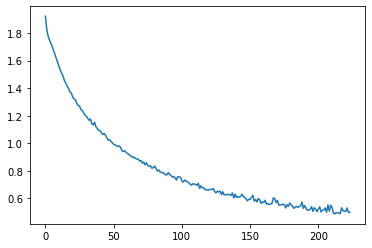

In [124]:
plt.plot(mlp_sev.loss_curve_)
plt.show()

In [128]:
df_sev["FIRE_SIZE_CLASS"].unique()

array(['A', 'C', 'B', 'D', 'E', 'G', 'F'], dtype=object)

In [131]:
print(classification_report(Y_test, prediction_sev, labels=Y["FIRE_SIZE_CLASS"].unique()))

              precision    recall  f1-score   support

           0       0.55      0.70      0.62       474
           2       0.53      0.58      0.55       474
           1       0.53      0.27      0.36       491
           3       0.77      0.83      0.80       512
           4       0.89      0.94      0.91       498
           6       0.99      0.99      0.99       458
           5       0.95      0.98      0.96       453

    accuracy                           0.75      3360
   macro avg       0.75      0.75      0.74      3360
weighted avg       0.74      0.75      0.74      3360



In [135]:
print(f1_score(Y_test, prediction_sev, average=None))

[0.61739944 0.35549525 0.55465587 0.79662605 0.91462218 0.96312364
 0.9912854 ]
